In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtilities import asManyPlots

In [2]:
filename1 = 'temp_profile_vph_01.txt'
filename2 = 'temp_profile_vph_02.txt'
filename3 = 'temp_profile_vph_03.txt'
filename4 = 'temp_profile_vph_005.txt'
Time  = np.genfromtxt(filename1, dtype ='float', usecols =(0))
Temp1 = list(np.genfromtxt(filename1, dtype='float', usecols=(1)))
Temp2 = list(np.genfromtxt(filename2, dtype='float', usecols=(1)))
Temp3 = list(np.genfromtxt(filename3, dtype='float', usecols=(1)))
Temp4 = list(np.genfromtxt(filename4, dtype='float', usecols=(1)))




Time = Time * 1/(24*3600)
#radi = []
#for d in dens:
#    radi.append(d**(-1/3))
#vphot_lf = vphot_lf * 1/2.99792458e10
#vphot_lr = vphot_lr * 1/2.99792458e10

T0    = 5000
alpha = -0.4
t0    = 1.5 # in day 

OSError: temp_profile_vph_01.txt not found.

In [3]:
def temperature_code(Time):
    temp =[]
    for t in Time: 
        T = T0*(t/t0)**alpha
        temp.append(T)
    return temp

In [ ]:
Temp

# Draw Temp profile for a given R

In [4]:
Temp_para = temperature_code(Time)


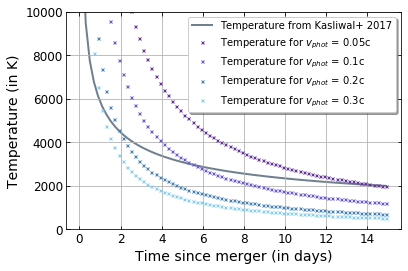

In [19]:
ax, lw = asManyPlots(111, [Time, Time, Time, Time, Time], [Temp_para, Temp4, Temp1, Temp2, Temp3], linestyle = ['-', 'None', 'None', 'None', 'None'], plotFlag=[True, True, True, True, True], color =['slategrey', 'rebeccapurple', 'slateblue', 'steelblue', 'skyblue'], 
                     markerSize = [0, 3, 3, 3, 3], marker=[None, 'x', 'x', 'x', 'x'], linewidth = 2, 
                     xlabel='Time since merger (in days)', ylabel='Temperature (in K)', textsize = 14, tickSize=12, 
                     showLegend=True, label= ['Temperature from Bulla +2019', 'New temperature for $v_{phot}$ = 0.05c', 'New temperature for $v_{phot}$ = 0.1c', 'New temperature for $v_{phot}$ = 0.2c', 'New temperature for $v_{phot}$ = 0.3c'], 
                     legendTextSize =10, ylim=[0,10000]
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis_set_minor_locator(MultopleLocator())
plt.savefig('profile_temp_new_geo.pdf', bbox_inches='tight')

In [ ]:
temp_axis = []
index     = 0


for t in time_axis:
    epsilon     = 10**30
    while (t == Time[index]) and (index< (len(Time)-1)):
        if abs(dens[index]-density)<epsilon:
            epsilon = abs(dens[index]-density)
            temperature = Temp[index]
        index+=1
    #print(temperature, index)
    temp_axis.append(temperature)


In [ ]:
temp_axis.remove(temp_axis[0])
time_axis.remove(time_axis[0])

# Draw Temperature Profile for a given time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtilities import asManyPlots

In [2]:
filename = 'temp_and_tau_mej0.05.txt'
Time = list(np.genfromtxt(filename, skip_header=1, dtype='float', usecols=(0)))
Temp = list(np.genfromtxt(filename, skip_header=1, dtype='float', usecols=(1)))
Tau = list(np.genfromtxt(filename,  skip_header=1, dtype='float', usecols=(2)))

T0    = 5000
alpha = -0.4
t0    = 1.5 # in day 

In [3]:
def temperature_code(Time):
    temp =[]
    for t in Time: 
        T = T0*(t/t0)**alpha
        temp.append(T)
    return temp

In [22]:
Time_select = []
Tau_select  = []
Temp_select = []
Time_order = list(np.unique(Time))
i   = 0
for t in Time_order:
    eps = 10**30 
    while Time[i] == t and i<(len(Time)-1):
        if abs(Tau[i]-1)<eps:
            eps  = abs(Tau[i]-1)
            temp = Temp[i]
            tau  = Tau[i]
        i+=1
    if tau < 1.1 and tau>0.9: 
        Temp_select.append(temp)
        Time_select.append(t)
        Tau_select.append(tau)
    
        

In [26]:
Temp_code = temperature_code(Time_select)

In [32]:
print(max(Tau_select), min(Tau_select))

1.08773 0.944987


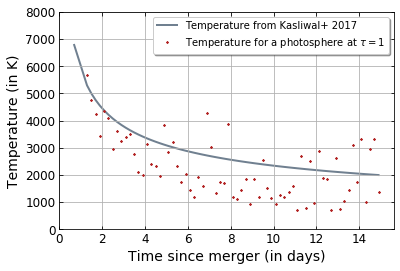

In [37]:
ax, lw = asManyPlots(111, [Time_select,Time_select], [Temp_code, Temp_select], linestyle = ['-','None'], plotFlag=[True, True], marker =['None', '*'], color =['slategrey', 'firebrick'],
                     markerSize = [0,2], linewidth = 2, showLegend = True, legendTextSize =10, label=['Temperature from Kasliwal+ 2017', 'Temperature for a photosphere at $\\tau= 1$'],textsize = 14, tickSize=12, 
                     xlabel='Time since merger (in days)', ylabel='Temperature (in K)', ylim=[0,8000]) 
                                              
                     
#ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.savefig('photosphere_at_tau=1.pdf', bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtilities import asManyPlots
c     = 2.99792458*10**(10)
sigma = 5.6704*10**(-5) 
Day     = 86400
filename = 'temp_profile_mej0.05.txt'
t_0 = 1*Day

R       = 0.3*c*1*Day
nb_cell = 100
step    = 2*R/(nb_cell)

radius = np.arange(0.5, R, step) 
time   = np.arange(0.25, 15, 0.5) * Day
dens   = np.zeros((len(radius),len(time))) 


Em     = np.unique((np.genfromtxt(filename, dtype ='float', usecols =(3))))[::-1]

radius1 = 0.3*c *time
dens1   = []

T0    = 5000
alpha = -0.4
t0    = 1.5 *Day# in day 

def temperature_code(Time):
    temp =[]
    for t in Time: 
        T = T0*(t/t0)**alpha
        temp.append(T)
    return temp


        
for i in range(len(radius1)):
    rho = (radius1[i])**(-3) * 10**30
    dens1.append(rho*(t_0/time[i])**3)

temp_para = temperature_code(time)

def temperature(Em, dens):
    u = Em * dens 
    temp = (c*u/(4*sigma))**(0.25)
    return temp

Temp1 = temperature(Em, dens[1])
Temp2 = temperature(Em, dens[len(radius)-1])

Temp_01 = temperature(Em, dens1)


time = time *1/Day
ax, lw = asManyPlots(111, [time, time, time, time], [temp_para, Temp1, Temp2, Temp_01], plotFlag=[True,True, True,True], color =['crimson', 'bisque', 'lightsteelblue', 'rebeccapurple'], 
                     markerSize = [0, 0, 0, 0], linewidth = 2, linestyle =['-', '-', '-', '-'],
                     xlabel='Time since merger (in days)', ylabel='Temperature (in K)', textsize = 14, tickSize=12, 
                     showLegend=True, label= ['Temperature from Kasliwal+ 2017', 'Temperature at the center', 'Temperature at the outer region', 'Temperature at 0.1c'], 
                     legendTextSize =10, ylim=[50, 8000])
plt.fill_between(time, Temp1, Temp2, color = 'rosybrown', alpha = 0.3)
#plt.savefig('vphot_blue_photons.pdf', bbox_inches='tight')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtilities import asManyPlots

filename = 'dens_r_relation.txt'
density = np.genfromtxt(filename, dtype ='float', usecols =(0))
radius  = np.genfromtxt(filename, dtype ='float', usecols =(1))

radius = radius**(-3)

np.polyfit(radius, density, 1)

a = np.polyfit(radius, density, 1)[0]
b = np.polyfit(radius, density, 1)[1]

curve_fit = a*radius

In [26]:
curve_fit

array([7.21711363e-16, 7.36385271e-16, 7.51253949e-16, ...,
       7.51253949e-16, 7.36385271e-16, 7.21711363e-16])

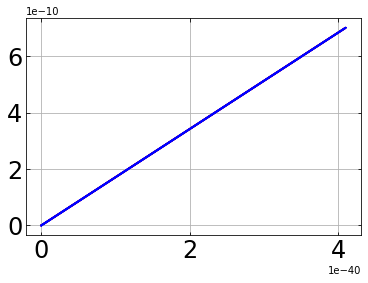

In [29]:
ax, lw = asManyPlots(111, [radius, radius], [density, curve_fit], plotFlag =[True, True], linestyle =['-', '-'], marker = [None, None], markerSize=[0,0], color=['red','blue'],linewidth = 2)

In [23]:
a

1.707325420302365e+30

In [16]:
density

array([7.21705e-46, 7.36382e-46, 7.51248e-46, ..., 7.51248e-46,
       7.36382e-46, 7.21705e-46])

In [10]:
radius[1000]

5.12996619339584e-46